In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn 
%pip install openpyxl
%pip install scikit-learn

In [3]:
from utils import path_setup
path_setup()
from src.paths import PROCESSED_DATA, RAW_DATA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os




In [4]:
welds= os.path.join(RAW_DATA, "weld.xlsx")


data = pd.read_excel(welds)


data

,№ эксперимента,№ Слоя,"Скорость сварки, м/мин","Величина подачи проволоки, м/мин","Амплитуда колебаний, мм","Частота колебаний, мм","Ширина валика, мм","Высота валика, мм",Годность
0,1,4,0.3,4.5,6.0,2.0,12.2,0.9,да
1,1,5,0.3,4.5,6.0,1.5,12.6,2.0,да
2,1,6,0.3,4.5,6.0,1.0,14.1,1.7,нет
3,1,7,0.3,4.5,5.0,2.4,13.6,2.0,нет
4,1,8,0.3,4.5,5.0,2.0,13.6,1.3,нет
...,...,...,...,...,...,...,...,...,...
69,13,7,0.3,4.5,4.9,1.8,NaN,NaN,нет
70,14,4,0.3,4.5,5.4,1.7,NaN,NaN,да
71,14,5,0.3,4.5,5.4,1.7,NaN,NaN,да
72,14,6,0.3,4.5,5.4,1.7,NaN,NaN,нет


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
№ эксперимента,74.0,6.729730,4.152231,1.0,3.0,6.5,10.0,14.0
№ Слоя,74.0,6.405405,1.922605,4.0,5.0,6.0,8.0,12.0
"Скорость сварки, м/мин",74.0,0.300000,0.000000,0.3,0.3,0.3,0.3,0.3
"Величина подачи проволоки, м/мин",74.0,4.500000,0.000000,4.5,4.5,4.5,4.5,4.5
"Амплитуда колебаний, мм",74.0,4.931081,0.962435,2.5,4.5,5.0,5.5,6.5
"Частота колебаний, мм",74.0,1.852703,0.405518,1.0,1.7,1.8,2.0,3.5
"Ширина валика, мм",57.0,10.994737,2.210157,5.4,10.3,11.6,12.6,14.1
"Высота валика, мм",57.0,1.707018,0.592471,0.4,1.3,1.7,2.0,3.6


In [6]:
data.isna().sum()

№ эксперимента                       0
№ Слоя                               0
Скорость сварки, м/мин               0
Величина подачи проволоки, м/мин     0
Амплитуда колебаний, мм              0
Частота колебаний, мм                0
Ширина валика, мм                   17
Высота валика, мм                   17
Годность                             0
dtype: int64

In [7]:
null_data =data[data.isnull().any(axis=1)]
null_data

,№ эксперимента,№ Слоя,"Скорость сварки, м/мин","Величина подачи проволоки, м/мин","Амплитуда колебаний, мм","Частота колебаний, мм","Ширина валика, мм","Высота валика, мм",Годность
57,11,4,0.3,4.5,5.5,1.8,NaN,NaN,да
58,11,5,0.3,4.5,5.5,1.8,NaN,NaN,да
59,11,6,0.3,4.5,5.5,1.8,NaN,NaN,нет
60,12,4,0.3,4.5,4.5,1.8,NaN,NaN,да
61,12,5,0.3,4.5,4.5,1.8,NaN,NaN,да
62,12,6,0.3,4.5,4.5,1.8,NaN,NaN,да
63,12,7,0.3,4.5,4.5,1.8,NaN,NaN,нет
64,12,8,0.3,4.5,4.5,1.8,NaN,NaN,нет
65,12,9,0.3,4.5,4.5,1.8,NaN,NaN,нет
66,13,4,0.3,4.5,4.9,1.8,NaN,NaN,да


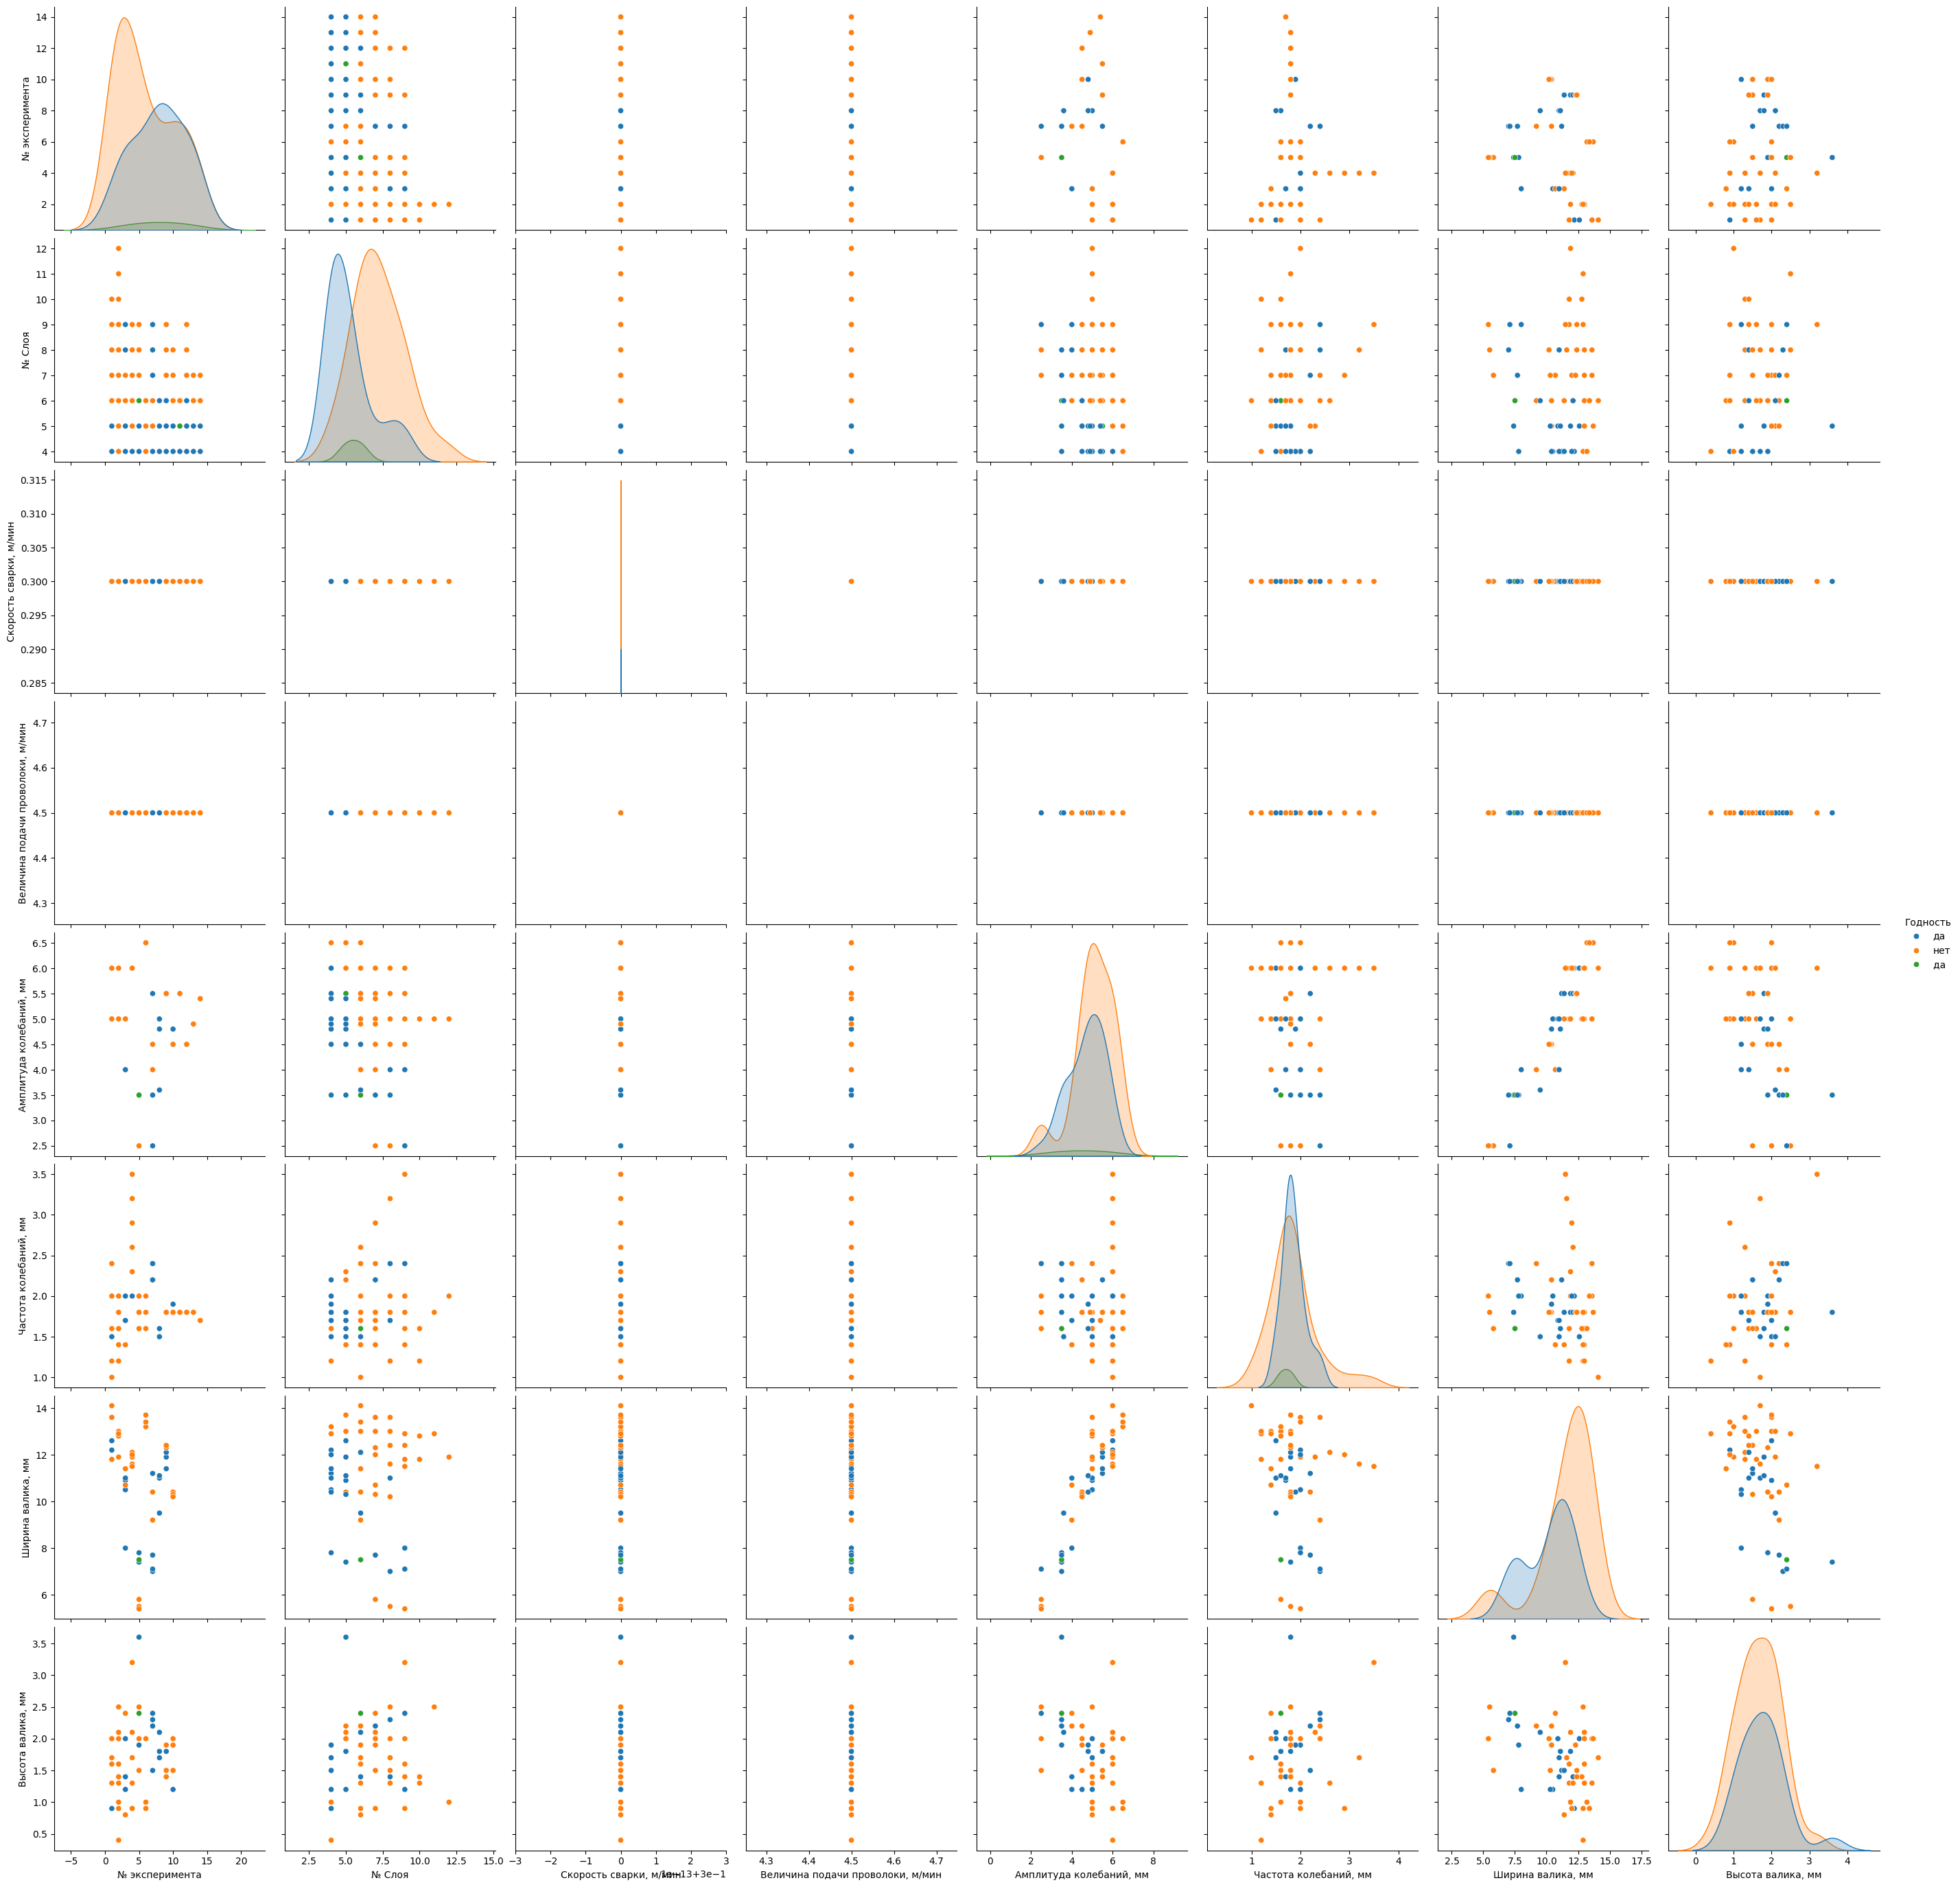

In [8]:
sns.pairplot(data, hue="Годность", hue_order=data["Годность"].unique(), height=3.5)
plt.show()


In [9]:
print(data["Годность"].unique())
data.loc[data["Годность"]=="да "].count()

['да' 'нет' 'да ']


№ эксперимента                      2
№ Слоя                              2
Скорость сварки, м/мин              2
Величина подачи проволоки, м/мин    2
Амплитуда колебаний, мм             2
Частота колебаний, мм               2
Ширина валика, мм                   1
Высота валика, мм                   1
Годность                            2
dtype: int64

In [10]:
print(data.columns)

Index(['№ эксперимента', '№ Слоя', 'Скорость сварки, м/мин',
       'Величина подачи проволоки, м/мин', 'Амплитуда колебаний, мм',
       'Частота колебаний, мм', 'Ширина валика, мм', 'Высота валика, мм',
       'Годность'],
      dtype='object')


In [11]:
from src.preparation.rename import rename_cols
from src.preparation.delete_cols import del_consts


In [12]:
cleaned_data = rename_cols(data)
cleaned_data = del_consts(cleaned_data)

cleaned_data

,Experiment,Layer,Amp,FreQ,e,h,Optimal
0,1,4,6.0,2.0,12.2,0.9,да
1,1,5,6.0,1.5,12.6,2.0,да
2,1,6,6.0,1.0,14.1,1.7,нет
3,1,7,5.0,2.4,13.6,2.0,нет
4,1,8,5.0,2.0,13.6,1.3,нет
...,...,...,...,...,...,...,...
69,13,7,4.9,1.8,NaN,NaN,нет
70,14,4,5.4,1.7,NaN,NaN,да
71,14,5,5.4,1.7,NaN,NaN,да
72,14,6,5.4,1.7,NaN,NaN,нет


In [ ]:
cleaned_data.Optimal=cleaned_data.Optimal.map(lambda x: x.strip())
print(cleaned_data.Optimal.unique())
cleaned_data.Optimal=cleaned_data.Optimal.map({"да":1,"нет":0})


['да' 'нет']


,Experiment,Layer,Amp,FreQ,e,h,Optimal
0,1,4,6.0,2.0,12.2,0.9,1
1,1,5,6.0,1.5,12.6,2.0,1
2,1,6,6.0,1.0,14.1,1.7,0
3,1,7,5.0,2.4,13.6,2.0,0
4,1,8,5.0,2.0,13.6,1.3,0
...,...,...,...,...,...,...,...
69,13,7,4.9,1.8,NaN,NaN,0
70,14,4,5.4,1.7,NaN,NaN,1
71,14,5,5.4,1.7,NaN,NaN,1
72,14,6,5.4,1.7,NaN,NaN,0


In [15]:
cleaned_data.to_excel(os.path.join(PROCESSED_DATA,"cleaned_data.xlsx"))